# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\balda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [23]:
data_path = "../data/txt/"

## Choisir une décennie

In [18]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [24]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [25]:
# Exemple de fichiers
files[:5]

['KB_JB838_1960-07-01_01-00001.txt',
 'KB_JB838_1960-07-01_01-00002.txt',
 'KB_JB838_1960-07-01_01-00003.txt',
 'KB_JB838_1960-07-01_01-00004.txt',
 'KB_JB838_1960-07-01_01-00005.txt']

In [26]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [27]:
# Exemple de textes
texts[0][:400]

"74* ANNEE — N* 157 • JOURNAL OUOTtDlîN 24 Pages - 2 fr. Congo « h. franc» t H. T. 0 (r 30 — Sulu» t 0 tr. 40 9uUl9» CHEQUES POSTAUX PUBltCITE t CompU n* 5674 ROSSEL 4 C'» VENTE i Soir «t Soir Illustré t I46B6 Rotxl i C 1 * DONS aux CEuvr#» du Soir {,14232 Rouol 6 C'* Les manuscrits non Inséré* ne sont pas rendus ACENCC ROS6EL . Annonces et Publicité LE SOIR - Vente et Abonnements : BRUXELLES I : 1"

## Vectoriser les documents à l'aide de TF-IDF

In [28]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [29]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [30]:
tfidf_vectors = vectorizer.fit_transform(texts)

C:\Users\balda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [31]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 366253 stored elements and shape (539, 3441)>

### Imprimer le vecteur tf-IDF du premier document

In [32]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

kasavubu        0.249278
roi             0.245121
lumumba         0.189522
congolais       0.187399
léopoldville    0.167095
                  ...   
00              0.000000
000             0.000000
01              0.000000
02              0.000000
's              0.000000
Length: 3441, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [33]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [34]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [35]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [36]:
tfidf_array = tfidf_vectors.toarray()

In [37]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.02546659,
       0.        ], shape=(3441,))

In [38]:
# Vecteur du document 1
tfidf_array[1]

array([0.04032065, 0.        , 0.        , ..., 0.        , 0.        ,
       0.01649073], shape=(3441,))

In [39]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.6134413040753882)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [40]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [41]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [42]:
clusters = km_model.fit_predict(tfidf_vectors)

In [43]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [44]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1960-07-01_01-00019.txt',
               'KB_JB838_1960-07-01_01-00020.txt',
               'KB_JB838_1960-07-01_01-00021.txt',
               'KB_JB838_1960-07-02_01-00017.txt',
               'KB_JB838_1960-07-02_01-00018.txt',
               'KB_JB838_1960-07-02_01-00019.txt',
               'KB_JB838_1960-07-03_01-00019.txt',
               'KB_JB838_1960-07-03_01-00020.txt',
               'KB_JB838_1960-07-03_01-00021.txt',
               'KB_JB838_1960-07-03_01-00022.txt',
               'KB_JB838_1960-07-05_01-00018.txt',
               'KB_JB838_1960-07-05_01-00019.txt',
               'KB_JB838_1960-07-05_01-00020.txt',
               'KB_JB838_1960-07-06_01-00018.txt',
               'KB_JB838_1960-07-06_01-00019.txt',
               'KB_JB838_1960-07-06_01-00020.txt',
               'KB_JB838_1960-07-07_01-00018.txt',
               'KB_JB838_1960-07-07_01-00019.txt',
               'KB_JB838_1960-07-07_01-00020.txt',
               'KB_JB838_1960-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [45]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [46]:
reduced_vectors[:10]

array([[-0.28024046, -0.23384449],
       [-0.28661617, -0.18706114],
       [-0.3176346 , -0.2697745 ],
       [-0.17543108, -0.04271663],
       [-0.1855679 , -0.04687329],
       [-0.20787306, -0.02866492],
       [-0.26232384, -0.16711586],
       [-0.15851505,  0.06644277],
       [-0.16893697, -0.01130413],
       [-0.15829487,  0.24796268]])

### Générer le plot

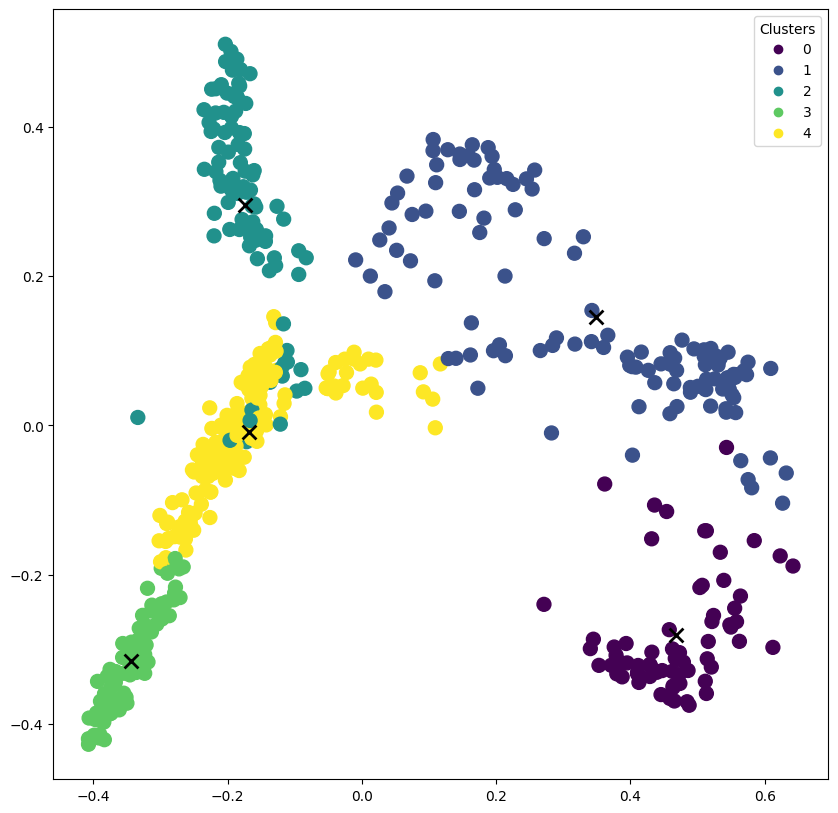

In [47]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

In [48]:
import numpy as np

# Top mots par cluster (centroïdes KMeans)
terms = vectorizer.get_feature_names_out()

order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]

TOP_N = 15
for i in range(N_CLUSTERS):
    top_terms = [terms[ind] for ind in order_centroids[i, :TOP_N]]
    print(f"\n=== Cluster {i} (top {TOP_N} mots) ===")
    print(", ".join(top_terms))



=== Cluster 0 (top 15 mots) ===
dem, rossel, pr, ag, ecr, ecrire, av, bilingue, prés, trav, agence, réf, brux, rem, firme

=== Cluster 1 (top 15 mots) ===
app, av, ét, pr, opel, villa, cv, gar, 57, conf, louer, vis, 58, mod, 56

=== Cluster 2 (top 15 mots) ===
mn, bat, mme, 2., 3., enf, pts, finale, 4., division, km, peloton, 5., mlle, course

=== Cluster 3 (top 15 mots) ===
gouvernement, ministre, congolais, lumumba, léopoldville, troupes, katanga, conseil, ministres, soldats, unies, publique, réfugiés, président, déclaré

=== Cluster 4 (top 15 mots) ===
musique, 1/2, 1/4, 3/4, id, musée, ap, film, concert, orchestre, ea, tendance, sentiments, marché, pf
